In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
import numpy as np

In [44]:
# https://data.world/cdc/2015-drug-overdose-deaths
df1 = pd.read_csv('2015-death-data.csv', index_col=0)

In [45]:
df1.head()

,Range,Rate,Number,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
State,,,,,,,
AL,13.6 to 16.0,15.7,736,NaN,NaN,NaN,NaN
AK,13.6 to 16.0,16.0,122,NaN,NaN,NaN,NaN
AZ,18.6 to 21.0,19.0,"1,274",NaN,NaN,NaN,NaN
AR,13.6 to 16.0,13.8,392,NaN,NaN,NaN,NaN
CA,11.1 to 13.5,11.3,"4,659",NaN,NaN,NaN,NaN


In [46]:
df1.tail()

# Rate variable is how many deaths per 100,000 people. 

,Range,Rate,Number,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
State,,,,,,,
WA,13.6 to 16.0,14.7,"1,094",NaN,NaN,NaN,NaN
WV,21.0 to 41.5,41.5,725,NaN,NaN,NaN,NaN
WI,13.6 to 16.0,15.5,878,NaN,NaN,NaN,NaN
WY,16.1 to 18.5,16.4,96,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# Get rid of the empty columns

columns = ['Range', 'Rate', 'Number']
df1 = pd.DataFrame(df1, columns=columns)

In [48]:
df1.head()

,Range,Rate,Number
State,,,
AL,13.6 to 16.0,15.7,736
AK,13.6 to 16.0,16.0,122
AZ,18.6 to 21.0,19.0,"1,274"
AR,13.6 to 16.0,13.8,392
CA,11.1 to 13.5,11.3,"4,659"


In [49]:
df1.tail()

,Range,Rate,Number
State,,,
WA,13.6 to 16.0,14.7,"1,094"
WV,21.0 to 41.5,41.5,725
WI,13.6 to 16.0,15.5,878
WY,16.1 to 18.5,16.4,96
NaN,NaN,NaN,NaN


In [50]:
df1.dropna()

,Range,Rate,Number
State,,,
AL,13.6 to 16.0,15.7,736
AK,13.6 to 16.0,16.0,122
AZ,18.6 to 21.0,19.0,"1,274"
AR,13.6 to 16.0,13.8,392
CA,11.1 to 13.5,11.3,"4,659"
CO,13.6 to 16.0,15.4,869
CT,21.0 to 41.5,22.1,800
DE,21.0 to 41.5,22.0,198
DC,18.6 to 21.0,18.6,125


In [51]:
df1.shape

(52, 3)

In [95]:
# https://data.world/associatedpress/opioid-prescriptions-2010-2015
# MME is Morphine Milligram Equivalents
# fips = federal identification code for each county
df2 = pd.read_csv('Opioid_prescription_amounts.csv', index_col=0)

In [96]:
df2.head()

,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
FIPS,,,,,,
2050,AK,BETHEL,NaN,NaN,NaN,NaN
2068,AK,DENALI,NaN,NaN,NaN,NaN
2013,AK,ALEUTIANS EAST,NaN,NaN,NaN,NaN
2016,AK,ALEUTIANS WEST,NaN,NaN,NaN,NaN
2240,AK,SOUTHEAST FAIRBANKS,NaN,NaN,NaN,NaN


In [54]:
# get rid of NAs
df2.dropna()

,State,County,MME_PerCap_2010,MME_PerCap_2015,Quartile_2015,2010-2015_Change
FIPS,,,,,,
2122,AK,KENAI PENINSULA,1362.1,1343.7,4.0,Stable
2170,AK,MATANUSKA SUSITNA,930.4,869.3,3.0,Stable
2020,AK,ANCHORAGE,863.8,808.9,3.0,Stable
2130,AK,KETCHIKAN GATEWAY,817.4,731.1,3.0,Decreased
2195,AK,PETERSBURG,1017.7,682.9,3.0,Decreased
...,...,...,...,...,...,...
56001,WY,ALBANY,458.4,410.9,1.0,Decreased
56039,WY,TETON,406.3,387.8,1.0,Stable
56005,WY,CAMPBELL,581.7,384.7,1.0,Decreased


In [55]:
# build a for loop that goes through the data set and combines the counties into each state.

In [56]:
# combine dataframes 

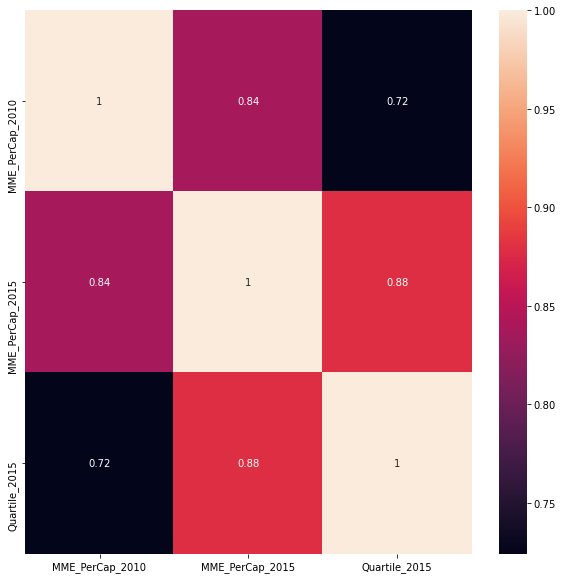

In [57]:
# too early to find correlations

fig = plt.figure(figsize= (10,10))
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [58]:
"opioid-prescriptions-dispensed-us-1991-2013"

'opioid-prescriptions-dispensed-us-1991-2013'

In [103]:
df3 = pd.read_csv('opioid-prescriptions-dispensed-us-1991-2013.csv', index_col= 0)

In [104]:
df3.tail()

,Prescriptions Dispensed (millions)
Year,
2009,202
2010,210
2011,219
2012,217
2013,207


In [73]:
list(df3)

['Prescriptions Dispensed (millions)']

In [85]:
df3.shape

(23, 1)

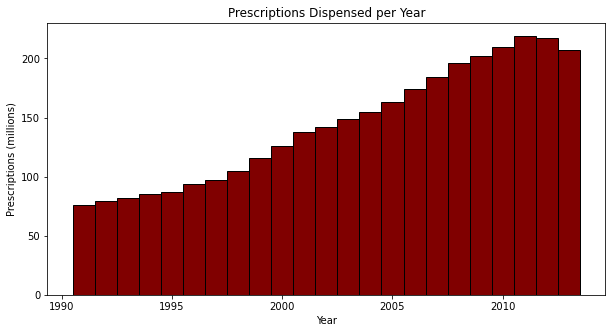

In [115]:
data = df3

prescriptions = df3["Prescriptions Dispensed (millions)"]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df3.index, prescriptions, color ='maroon',
        width = 1, edgecolor = "black")
 
plt.xlabel("Year")
plt.ylabel("Prescriptions (millions)")
plt.title("Prescriptions Dispensed per Year")
plt.show()

In [ ]:
EducationReport

In [127]:
df4 = pd.read_excel('EducationReport.xlsx', index_col= 0)

In [128]:
df4

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,Total,NaN,NaN,NaN,NaN,Urban,NaN,NaN,NaN,NaN,NaN,Rural,NaN,NaN,NaN,NaN,NaN
Name,1970,1980.000000,1990.000000,2000.000000,2015-2019,1970,1980.000000,1990.000000,2000.000000,2015-2019,NaN,1970,NaN,1980.000000,1990.000000,2000.000000,2015-2019
United States,0.106618,0.162296,0.203380,0.244016,0.321455,0.11542,0.174884,0.219667,0.262235,0.341864,NaN,0.0672646,NaN,0.104972,0.122836,0.149003,0.199979
Alabama,0.0784698,0.121797,0.156808,0.190347,0.254683,0.0888388,0.137495,0.178450,0.217080,0.285907,NaN,0.0529989,NaN,0.082044,0.097791,0.115997,0.154118
Alaska,0.141403,0.212102,0.230932,0.247149,0.295512,0.15522,0.225265,0.251296,0.265576,0.321244,NaN,0.134661,NaN,0.188858,0.191536,0.209847,0.243314
Arizona,0.125604,0.174137,0.202884,0.235310,0.294668,0.129671,0.179187,0.209834,0.242078,0.301717,NaN,0.0747453,NaN,0.103254,0.097785,0.124178,0.156509
Arkansas,0.0665505,0.108201,0.133211,0.166606,0.230278,0.0824837,0.132572,0.163141,0.201931,0.274021,NaN,0.0509748,NaN,0.082526,0.098276,0.121767,0.160592
California,0.134449,0.196017,0.233568,0.266209,0.33926,0.135546,0.197328,0.235599,0.268460,0.341727,NaN,0.0868783,NaN,0.145792,0.156152,0.179830,0.233536
Colorado,0.14926,0.229590,0.269690,0.326927,0.409123,0.161532,0.240337,0.281970,0.340332,0.422582,NaN,0.0914622,NaN,0.172372,0.197881,0.250248,0.319964


In [120]:
df4.dropna()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17


In [129]:
# https://data.world/rubyn/ses-demographics-arrests-analysis/workspace/data-dictionary
# 2017 data doesn't quite line up with the 2015 opiod data but it will work for the sake of exploratory analysis
# hypothesis: the rising rate of opiod, education level, and state play a factor in opiod related death.

df5 = pd.read_excel('State - Income, Education Level by State.xlsx', index_col= 0)

In [130]:
df5.head()

,region,state_median_income,state_income_percentile,state_proportion_with_bachelors_or_higher,total_colleges_within_25km_of_state_counties,total_colleges_within_50km_of_state_counties,total_colleges_within_75km_of_state_counties,total_colleges_within_100km_of_state_counties
state,,,,,,,,
Alabama,Southeast,40271.402985,0.266510,0.2642,126,449,1042,1839
Alaska,West,66425.448276,0.820631,0.1705,0,0,0,0
Arizona,Southwest,45816.666667,0.423407,0.2270,11,47,107,202
Arkansas,Southeast,39025.080000,0.212615,0.1577,137,495,1121,1955
California,West,61046.758621,0.700403,0.1849,399,1379,2705,4292
